# Анализ оттока клиентов банка «Метанпромбанк»

[Ссылка на презентацию:](https://drive.google.com/file/d/1L9paTGZvFmRBLZ99RqTZP-3kJ4WZNIsZ/view?usp=drive_link)

[Дашборд:](https://public.tableau.com/app/profile/ori.trob/viz/georgievabanks_project/Dashboard12?publish=yes)

**Единтсвенное, я дашборд создавала под вымышлиной учеткой, боялась, что русскую учетку заблочат((надеюсь это не косяк.**

**Цель исследования** — анализ сегментов клиентов банка, уходящих и склонных к уходу. Проверка гипотез причин оттока клиентов.

**Задачи проекта**:

- Исследование данных, поиск различных взаимосвязей,
- Cоставление портрета уходящего клиента,
- Проверка статистических гипотез,
- Сегментирование клиентов, приоритизация их в соответствии со степенью подверженности оттоку из банка,
- Подготовка выводов и рекомендаций для отдела маркетинга.

**Описание данных** 

Датасет содержит данные о клиентах банка «Метанпром». Банк располагается в
Ярославле и областных городах: Ростов Великий и Рыбинск.


Колонки:
- userid — идентификатор пользователя,
- score — баллы кредитного скоринга,
- City — город,
- Gender — пол,
- Age — возраст,
- equity — количество баллов собственности
- Balance — баланс на счёте,
- Products — количество продуктов, которыми пользуется клиент,
- CreditCard — есть ли кредитная карта,
- last_activity — активный клиент,
- estimated_salary — заработная плата клиента,
- Churn — ушёл или нет.

## Изучение общей информации

In [1]:
# импорт библиотек
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

In [2]:
# читаем csv-файл
try:
    data=pd.read_csv('https://code.s3.yandex.net/datasets/bank_scrooge.csv')
except:
    data=pd.read_csv('https://code.s3.yandex.net/datasets/bank_scrooge.csv')

In [3]:
#Выводим первые 10 строчек датафрейма data на экран и инфу
display(data.head(10))
data.info()

,USERID,score,city,gender,age,equity,balance,products,credit_card,last_activity,EST_SALARY,churn
0,183012,850.0,Рыбинск,Ж,25.0,1,59214.82,2,0,1,75719.14,1
1,146556,861.0,Рыбинск,Ж,37.0,5,850594.33,3,1,0,86621.77,0
2,120722,892.0,Рыбинск,Ж,30.0,0,NaN,1,1,1,107683.34,0
3,225363,866.0,Ярославль,Ж,51.0,5,1524746.26,2,0,1,174423.53,1
4,157978,730.0,Ярославль,М,34.0,5,174.00,1,1,0,67353.16,1
5,202305,856.0,Рыбинск,М,56.0,4,863687.24,3,1,0,156619.80,0
6,177259,807.0,Ярославль,Ж,39.0,3,405042.44,3,0,1,103838.32,0
7,218868,825.0,Ярославль,Ж,38.0,4,458145.40,2,1,1,68085.48,0
8,211686,923.0,Ярославль,М,54.0,5,1206337.87,2,1,0,155371.79,0
9,133130,906.0,Ярославль,Ж,67.0,0,NaN,1,0,1,238055.53,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   USERID         10000 non-null  int64  
 1   score          10000 non-null  float64
 2   city           10000 non-null  object 
 3   gender         10000 non-null  object 
 4   age            9974 non-null   float64
 5   equity         10000 non-null  int64  
 6   balance        7705 non-null   float64
 7   products       10000 non-null  int64  
 8   credit_card    10000 non-null  int64  
 9   last_activity  10000 non-null  int64  
 10  EST_SALARY     10000 non-null  float64
 11  churn          10000 non-null  int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 937.6+ KB



<b>Вывод</b>    
    
Представлен датафрейм состоящий из 12 столбцов и 10 000 записей. Для дальнейшей работы данные необходимо отредактировать:
- названия столбцов USERID, EST_SALARY привести к нижнему регистру,
- поменяем тип в столбцах score, age,
- проверить на явные дубликаты, в случае чего удалить их
- в столбцах age и balance видны пропуски, в дальнейшем их надо изучить.

## Предобработка данных 

In [4]:
#Дадим названиям столбцов рабочий вид
data = data.rename(columns={'USERID' : 'user_id', 'EST_SALARY':'est_salary'})

In [5]:
#заменим в нужных столбцах вещественный тип на целочисленный
data['score'] = data['score'].astype('int')

**Сразу поменять тип в столбце age не получится, т.к там есть пропуск, убедимся в этом посмотрев уникальные значения**

In [6]:
#смотрим уникальные значения
display(data['age'].sort_values().unique())

array([18., 19., 20., 21., 22., 23., 24., 25., 26., 27., 28., 29., 30.,
       31., 32., 33., 34., 35., 36., 37., 38., 39., 40., 41., 42., 43.,
       44., 45., 46., 47., 48., 49., 50., 51., 52., 53., 54., 55., 56.,
       57., 58., 59., 60., 61., 62., 63., 64., 65., 66., 67., 68., 69.,
       70., 71., 72., 73., 74., 75., 76., 77., 78., 79., 80., 81., 82.,
       83., 84., 86., nan])

In [7]:
#количество пропусков в возрасте
print('Обнаружено пропусков:', data['age'].isna().sum())
print('От общей базы это составляет: ', 
      (((data['age'].isna().sum() / len(data['age']))*100), 2), '%', sep='')

Обнаружено пропусков: 26
От общей базы это составляет: 0.26%


**Обнаруженых пропусков в столбце age крайне мало (0.26% от всего датасета), поэтому удалим их.**

In [8]:
#удаление пропусков в возрасте
data = data.dropna(subset=['age'])
print('Обнаружено пропусков:', data['age'].isna().sum())

Обнаружено пропусков: 0


In [9]:
#заменим в нужных столбцах вещественный тип на целочисленный
data['age'] = data['age'].astype('int')

In [10]:
# Проверим явные дубликаты в датафрейме:
data.duplicated().sum()

0

In [11]:
#найдем неявные дубликаты в user_id
print('Обнаружено дубликатов:', data['user_id'].duplicated().sum())
print('От общей базы это составляет: ', round(((data['user_id'].duplicated().sum() / len(data['user_id']))*100), 2), '%', sep='')

Обнаружено дубликатов: 50
От общей базы это составляет: 0.5%


In [12]:
display(data.query('user_id.duplicated()').head())

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
1583,190253,726,Ярославль,М,49,0,NaN,1,1,1,177700.78,0
1837,210662,896,Рыбинск,Ж,37,0,NaN,2,0,0,90916.04,0
2138,131419,739,Рыбинск,Ж,37,3,1307941.65,3,0,0,103867.47,0
2302,220816,934,Рыбинск,Ж,74,5,1294285.39,3,1,0,95606.80,0
2998,208081,821,Рыбинск,Ж,62,3,493608.26,2,1,1,33491.45,0


In [13]:
#
display(data.query('user_id == 190253'))

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
231,190253,823,Рыбинск,М,37,4,373348.39,2,0,1,131947.92,1
1583,190253,726,Ярославль,М,49,0,NaN,1,1,1,177700.78,0


In [14]:
display(data.query('user_id == 226719'))

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
2597,226719,990,Ярославль,М,37,4,14648692.14,2,0,0,934412.61,1
4216,226719,903,Рыбинск,Ж,63,0,NaN,1,1,0,138582.58,0


In [15]:
display(data.query('user_id == 170312'))

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
790,170312,901,Ярославль,М,33,4,3276783.93,3,0,1,358700.96,1
3039,170312,813,Рыбинск,Ж,47,3,370027.67,2,0,0,129835.56,0


In [16]:
#проверим из каких городов
data.query('user_id.duplicated()')['city'].value_counts()

Рыбинск      29
Ярославль    21
Name: city, dtype: int64

In [17]:
#удалим дубликаты
#data['user_id'].drop_duplicates().reset_index(drop=True)
data = data.drop_duplicates(['user_id'])

**Найденные дубликаты в столбце user_id - 50 строк, из города Рыбинск и Ярославль, причем единый user_id принадлежит как ушедшему клиенту, так и оставшемуся. Возможно было слияние баз данных из этих городов. Т.к процент этих дубликатов меньше 1 от всей базы, то удалим их. Далее, проверим пропуски в балансе.**

In [18]:
#количество пропусков в балансе
print('Обнаружено пропусков:', data['balance'].isna().sum())
print('От общей базы это составляет: ', round(((data['balance'].isna().sum() / len(data['balance']))*100), 2), '%', sep='')

Обнаружено пропусков: 2260
От общей базы это составляет: 22.77%


In [19]:
# Вызовем метод describe и проанализируем баланс
data['balance'].describe()

count    7.664000e+03
mean     8.282063e+05
std      1.984122e+06
min      0.000000e+00
25%      2.955266e+05
50%      5.249277e+05
75%      9.807537e+05
max      1.191136e+08
Name: balance, dtype: float64

**Обнаруженых пропусков в столбце баланса существенная часть, поэтому удалять их точно нельзя, потеряем много данных. Заменить эти значения на 0 тоже нельзя, т.к нулевой баланс уже есть, это исказит данные. Среднее значение можно использовать только когда есть взаимосвязь, надо это проверить. Возможно есть взаимосвязь между балансом и оттоком**

In [20]:
#создадим датасет с NaN балансом 
nan_balan = data.query('balance.isna()')
display(nan_balan.head(10))

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
2,120722,892,Рыбинск,Ж,30,0,NaN,1,1,1,107683.34,0
9,133130,906,Ярославль,Ж,67,0,NaN,1,0,1,238055.53,0
10,148929,927,Ростов,М,52,0,NaN,1,1,1,196820.07,0
11,172184,921,Ростов,М,41,0,NaN,1,1,1,217469.48,0
19,127034,922,Рыбинск,Ж,53,0,NaN,1,0,0,147094.82,0
21,177415,896,Рыбинск,Ж,47,0,NaN,1,0,0,225060.35,0
30,155730,946,Ярославль,Ж,47,0,NaN,2,1,1,660015.85,0
34,205226,944,Ярославль,М,35,0,NaN,2,1,1,239843.39,0
39,173175,924,Рыбинск,Ж,51,0,NaN,1,1,1,248844.47,0
43,228585,956,Ростов,М,41,0,NaN,1,1,0,115117.10,0


In [21]:
#создадим функцию проверяющую связь баланса с другими параметрами
def srav(columns):
    w=nan_balan.groupby(columns)\
             .agg(count=(columns, 'count'))\
             .sort_values(by = 'count', ascending = False)\
             .reset_index() 
    w['share'] = round(w['count'] / (w['count'].sum())*100,2)
    display(w)
srav('city')

,city,count,share
0,Ярославль,1449,64.12
1,Рыбинск,576,25.49
2,Ростов,235,10.40


In [22]:
srav('gender')

,gender,count,share
0,М,1263,55.88
1,Ж,997,44.12


In [23]:
srav('age')

,age,count,share
0,36,104,4.60
1,33,97,4.29
2,37,96,4.25
3,35,90,3.98
4,34,88,3.89
...,...,...,...
61,81,2,0.09
62,77,1,0.04
63,79,1,0.04
64,83,1,0.04


In [24]:
srav('equity')

,equity,count,share
0,0,2145,94.91
1,1,114,5.04
2,3,1,0.04


In [25]:
srav('products')

,products,count,share
0,1,1921,85.00
1,2,310,13.72
2,3,28,1.24
3,0,1,0.04


In [26]:
srav('credit_card')

,credit_card,count,share
0,1,1843,81.55
1,0,417,18.45


In [27]:
srav('last_activity')

,last_activity,count,share
0,1,1241,54.91
1,0,1019,45.09


In [28]:
srav('churn')

,churn,count,share
0,0,2247,99.42
1,1,13,0.58


In [29]:
nan_balan.query('churn == 1')

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
1273,136567,961,Ярославль,М,31,0,NaN,1,1,0,1015386.14,1
1400,146876,707,Ярославль,М,24,0,NaN,3,1,0,94091.11,1
3017,123230,980,Рыбинск,Ж,53,0,NaN,1,1,1,327646.02,1
4118,157443,727,Ростов,М,69,0,NaN,1,1,0,132546.93,1
4302,167482,955,Ярославль,М,62,0,NaN,1,1,0,157784.96,1
5578,136508,739,Рыбинск,М,49,0,NaN,2,1,1,280945.17,1
6827,205707,953,Ярославль,М,30,0,NaN,3,1,0,157069.20,1
7572,144559,748,Ярославль,М,45,0,NaN,1,1,0,288756.23,1
8185,116284,743,Ярославль,М,48,0,NaN,1,1,1,634457.21,1
8611,195981,763,Ярославль,Ж,48,0,NaN,1,1,0,248232.39,1


In [30]:
#применим метод describe для выявления явных выбросов
pd.set_option("display.float_format", "{:.2f}".format)
data.describe()

,user_id,score,age,equity,balance,products,credit_card,last_activity,est_salary,churn
count,9924.00,9924.00,9924.00,9924.00,7664.00,9924.00,9924.00,9924.00,9924.00,9924.00
mean,171737.16,848.73,42.73,2.63,828206.27,1.87,0.68,0.52,147880.18,0.18
std,33697.42,65.40,12.18,1.98,1984121.61,0.79,0.47,0.50,139358.30,0.39
min,94561.00,642.00,18.00,0.00,0.00,0.00,0.00,0.00,2546.30,0.00
25%,142725.00,802.00,33.00,0.00,295526.57,1.00,0.00,0.00,75252.18,0.00
50%,172643.00,853.00,40.00,3.00,524927.74,2.00,1.00,1.00,119715.39,0.00
75%,201159.25,900.00,51.00,4.00,980753.67,2.00,1.00,1.00,174666.93,0.00
max,229145.00,1000.00,86.00,9.00,119113552.01,5.00,1.00,1.00,1395064.45,1.00


**В целом данные достаточно чистые в плане выбросов, по ближе надо рассмотреть est_salary, т.к зп в размере 2546 вызывает сомнения, balance максимальное значение 119113552 выглядит фантастически прекрасно и на всякий случай проверить score, пожалуй с него и начнем**

![jupyter](https://fincult.info/upload/webp/als-property-editorblock/11c/11c84f57e61ffcea42c160f2b9eb1e72.webp)

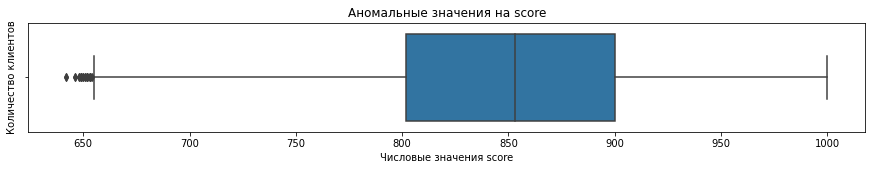

In [31]:
#построим функцию boxplot для столбцов score, balance, est_salary
def box(columns):
    plt.figure(figsize=(15, 2))
    sns.boxplot(data=data, x=columns)
    plt.title (f"Аномальные значения на {columns}")
    plt.ylabel('Количество клиентов')
    plt.xlabel(f"Числовые значения {columns}")
    plt.show()
box('score')

In [32]:
display(data.query('score < 650'))

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
265,157448,649,Рыбинск,М,37,0,NaN,1,1,1,81942.85,0
533,146648,649,Ярославль,М,33,0,NaN,1,1,1,149318.49,0
921,179302,646,Ярославль,М,37,0,NaN,1,1,1,148297.71,0
2532,151179,642,Рыбинск,М,69,0,NaN,1,1,1,35917.41,0
3168,173067,649,Ярославль,М,46,0,NaN,1,1,1,121654.31,0
4071,164000,648,Ярославль,М,28,0,NaN,1,1,0,27790.15,0
4690,135725,648,Ярославль,Ж,59,0,NaN,1,1,1,50326.03,0
5131,213745,646,Рыбинск,Ж,25,0,NaN,2,1,0,60562.33,0
6454,169067,649,Ярославль,М,55,0,NaN,1,1,1,130672.40,0
6751,182172,649,Ярославль,М,38,0,NaN,1,1,1,170288.90,0


In [33]:
data.query('score < 650')['user_id'].count()

13

**В score были выбросы в зачениях меньше 650, таких клиентов 13, в среднем, чтобы кредит был одобрен значение скорингового балла должно быть не менее 600 баллов. Поэтому отсавим как есть, к тому же эти клиенты из оставшихся.**

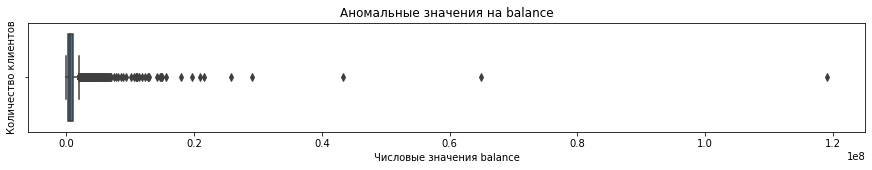

In [34]:
box('balance')

In [35]:
import numpy as np
display(np.nanpercentile(data['balance'], [95, 97.5, 99]))

array([2120139.6665, 3103551.728 , 4827291.1855])

In [36]:
display(data.query('balance >= 4827291'))

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
107,134358,985,Рыбинск,Ж,41,4,6749773.07,2,1,0,698013.27,0
125,227092,1000,Ярославль,М,32,5,19757180.85,2,1,1,1024626.50,0
143,198181,958,Ярославль,М,34,3,5763239.76,2,1,1,920730.06,1
248,180899,930,Ярославль,М,32,4,5527695.02,3,0,1,360963.15,0
324,221077,925,Ярославль,Ж,51,5,5049319.16,3,0,1,224310.01,0
...,...,...,...,...,...,...,...,...,...,...,...,...
8936,215126,914,Ярославль,М,39,4,7004446.61,3,0,1,891360.40,0
9082,159669,987,Ярославль,М,42,5,6071920.69,2,0,0,419911.64,0
9103,123965,939,Ярославль,М,34,5,9346657.08,1,1,1,1263028.49,1
9142,223934,969,Ярославль,М,39,3,14802129.74,1,1,0,766076.10,0


**Получается, что у 77 клиентов баланс больше 4 млн. Посмотрим как это отразится на дальнейшем исследование. Удалить всегда успеем. Далее рассмотрим значения по зп**

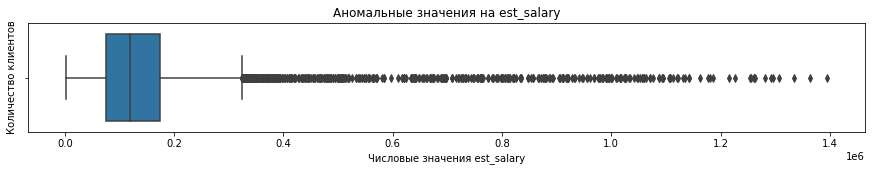

In [37]:
box('est_salary')

In [38]:
#проверим перцентль на выское зачение зп
display(np.percentile(data['est_salary'], [95, 97.5, 99]))

array([316818.7965    , 532275.59499999, 887381.7149    ])

In [39]:
print('Количество клиентов с зп больше 887381:', data.query('est_salary >= 887381')['user_id'].count())

Количество клиентов с зп больше 887381: 100


In [40]:
#проверим перцентль на ниское зачение зп
display(np.percentile(data['est_salary'], [5, 2.5, 1]))

array([31972.909  , 24428.96575, 17326.0706 ])

In [41]:
#посчитаем С 1 января 2023 года МРОТ в РФ - 16242 руб. (статья 1 Федерального закона от 19.06.2000 N 82-ФЗ)
print('Количество клиентов с зп меньше 16242:', data.query('est_salary <= 16242')['user_id'].count())

Количество клиентов с зп меньше 16242: 80


In [42]:
#сохраним всех аномальных в отдельной переменной, а из основного удалим
anomal=data.query('est_salary <= 16242 or est_salary >= 887381')

In [43]:
#удалим строки с выбросами:
data = data[(data['est_salary']>16242)]

In [44]:
data = data[(data['est_salary']<=887381)]

In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9744 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   user_id        9744 non-null   int64  
 1   score          9744 non-null   int64  
 2   city           9744 non-null   object 
 3   gender         9744 non-null   object 
 4   age            9744 non-null   int64  
 5   equity         9744 non-null   int64  
 6   balance        7547 non-null   float64
 7   products       9744 non-null   int64  
 8   credit_card    9744 non-null   int64  
 9   last_activity  9744 non-null   int64  
 10  est_salary     9744 non-null   float64
 11  churn          9744 non-null   int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 989.6+ KB



<b>Вывод</b>    
    
На этапе предработки столбцам задали рабочий вид, поменяли тип на целочисленный у столбцов age (удалили 0.26% пропусков) и score. Явные дубликаты в датафрейме отсутсвуют. Но были найдены дубликаты в столбце user_id - 50, т.к их было меньше 1% от общего, то удалили их.
    
Обнаружили пропуски в столбце balance 22.85% от общего количества данных. При подробном изучение заметили, что пропуски есть у клиентов:
- во всех городах, больше встречаются у клиентов из Ярославля - 63.98%,
- чуть больше у мужчин - 55.81%,
- у тех у кого отстувует собственность - 94.95%,
- пользуются только 1им продуктом банка - 84.86%,
- владеют кредитной картой - 81.53%,
- чуть более активные - 54.89%,
- и самое главное, только 13 (0.57%) из них ушли. 

В связи с тем, что взаимосвязь есть по многим параметрам, среднее или медиану не получится использовать. Поэтому сохраним значения NaN в балансе.

Проверили столбцы на анамолии, в балансе пока решили сохранить, а по зп удалили из основного датасета, но сохранили в отдельной переменой на всякий случай. В изначальном датасете осталось 9744 записи.

## Исследовательский анализ

### Распределение признаков отточности

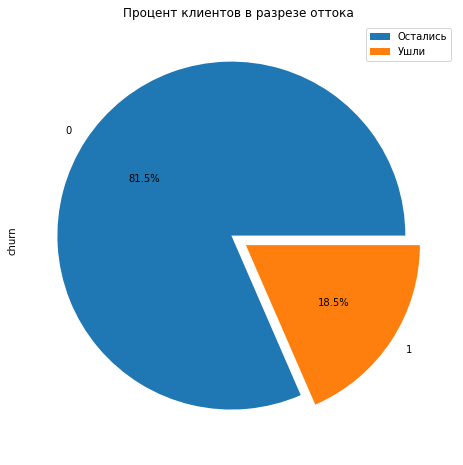

In [46]:
#определим общий уровень оттока по банку
otok = data.groupby('churn').agg({'churn': 'count'})

otok.plot(kind='pie', subplots=True, autopct='%1.1f%%',explode=[0.05, 0.05], figsize=(10,8))
plt.title('Процент клиентов в разрезе оттока')
plt.legend(['Остались', 'Ушли'])
plt.show()

**Получается, что 18.5% клиентов ушли, это достаточно выской показатель при такой группе, надо срочно принимать меры. Посмотрим ушедших в разрезе различных параметров.**

*Скоринговый балл – это показатель платежеспособности заемщика, выраженный в цифровом формате. Чем больше балл, тем выше вероятность одобрения заявки. Даже с нулевой кредитной историей заемщик будет иметь свой рейтинг.*

In [47]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9744 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   user_id        9744 non-null   int64  
 1   score          9744 non-null   int64  
 2   city           9744 non-null   object 
 3   gender         9744 non-null   object 
 4   age            9744 non-null   int64  
 5   equity         9744 non-null   int64  
 6   balance        7547 non-null   float64
 7   products       9744 non-null   int64  
 8   credit_card    9744 non-null   int64  
 9   last_activity  9744 non-null   int64  
 10  est_salary     9744 non-null   float64
 11  churn          9744 non-null   int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 989.6+ KB


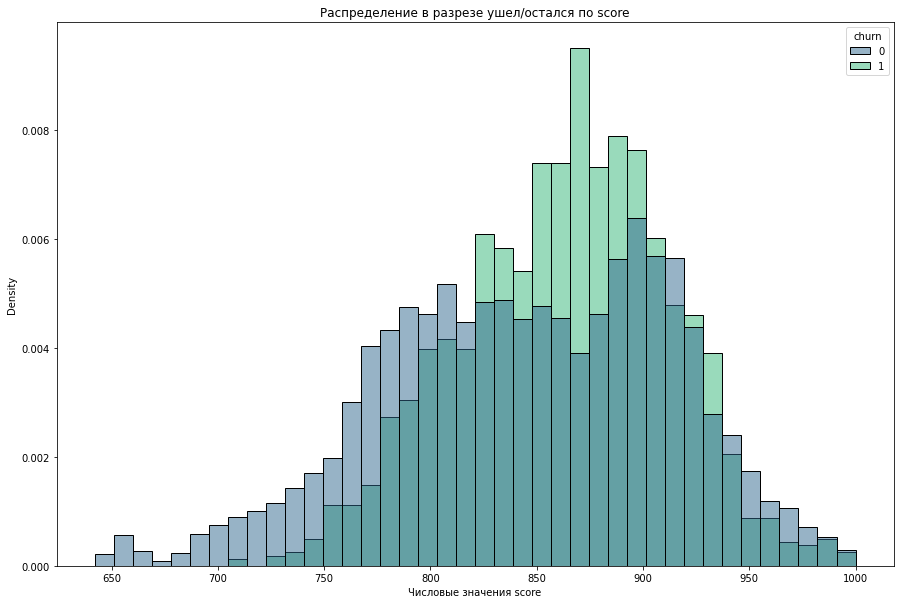

In [48]:
#построим функцию гистограммы для сравнения параметров остался/ушел
def graf(columns):
    plt.figure(figsize=(15, 10))
    sns.histplot(data=data, hue='churn', x=columns, stat='density', common_norm=False, palette="viridis")
    plt.title(f"Распределение в разрезе ушел/остался по {columns}")
    plt.xlabel(f"Числовые значения {columns}")
    plt.show()
graf('score')

**Отток по баллам скоринга начинается с 720 и до 1000, т.е это те клиенты у которых хороший балл платежеспособности, а значит перспективные клиенты уплывают. Следует разбить по категориям и посчитать в процентном соотношение.**

In [49]:
# создадим функцию, которая разобьет по категориям скоринговый балл
def sc_cat(data):
    if (data['score'] >= 650 and data['score'] <= 769):
        return 'Низкий балл'
    elif (data['score'] >= 770 and data['score'] <= 940):
        return 'Средний балл'
    else:
        return 'Высокий балл'

In [50]:
# создадим новый столбец и применим функцию к датафрейму
data['sc_category'] = data.apply(sc_cat, axis=1)
data.head(10)

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,sc_category
0,183012,850,Рыбинск,Ж,25,1,59214.82,2,0,1,75719.14,1,Средний балл
1,146556,861,Рыбинск,Ж,37,5,850594.33,3,1,0,86621.77,0,Средний балл
2,120722,892,Рыбинск,Ж,30,0,NaN,1,1,1,107683.34,0,Средний балл
3,225363,866,Ярославль,Ж,51,5,1524746.26,2,0,1,174423.53,1,Средний балл
4,157978,730,Ярославль,М,34,5,174.00,1,1,0,67353.16,1,Низкий балл
5,202305,856,Рыбинск,М,56,4,863687.24,3,1,0,156619.80,0,Средний балл
6,177259,807,Ярославль,Ж,39,3,405042.44,3,0,1,103838.32,0,Средний балл
7,218868,825,Ярославль,Ж,38,4,458145.40,2,1,1,68085.48,0,Средний балл
8,211686,923,Ярославль,М,54,5,1206337.87,2,1,0,155371.79,0,Средний балл
9,133130,906,Ярославль,Ж,67,0,NaN,1,0,1,238055.53,0,Средний балл


In [51]:
#создадим функцию считающую процент отточных клиентов по параметрам
def ot_cat(columns):
    q=data.query('churn == 1')\
             .groupby(columns)\
             .agg(count=(columns, 'count'))\
             .sort_values(by = 'count', ascending = False)\
             .reset_index() 
    q['share'] = round(q['count'] / (q['count'].sum())*100,2)
    display(q)
ot_cat('sc_category')

,sc_category,count,share
0,Средний балл,1667,92.61
1,Высокий балл,76,4.22
2,Низкий балл,57,3.17


**Наивысший отток в группе Средний балл (от 770 до 940 баллов) практически 93%, наименьший отток в Низком балле (от 650 до 769) всего 3.17%**

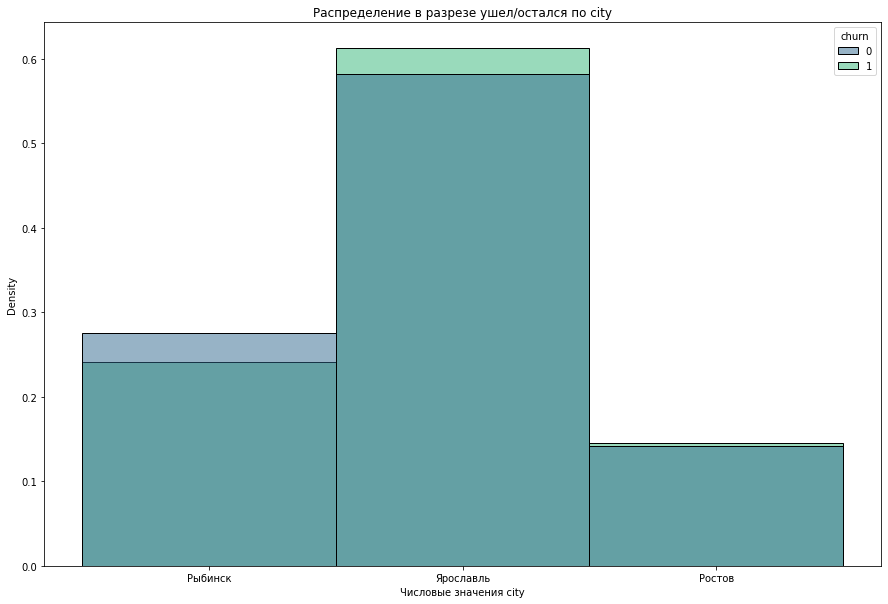

In [52]:
#посмотрим на распределение по городам
graf('city')

In [53]:
ot_cat('city')

,city,count,share
0,Ярославль,1103,61.28
1,Рыбинск,435,24.17
2,Ростов,262,14.56


**Есстественно наивысший отток по Ярославлю - 61,28%. т.к там изначально больше людей, но меньше в Ростове 14,56%**

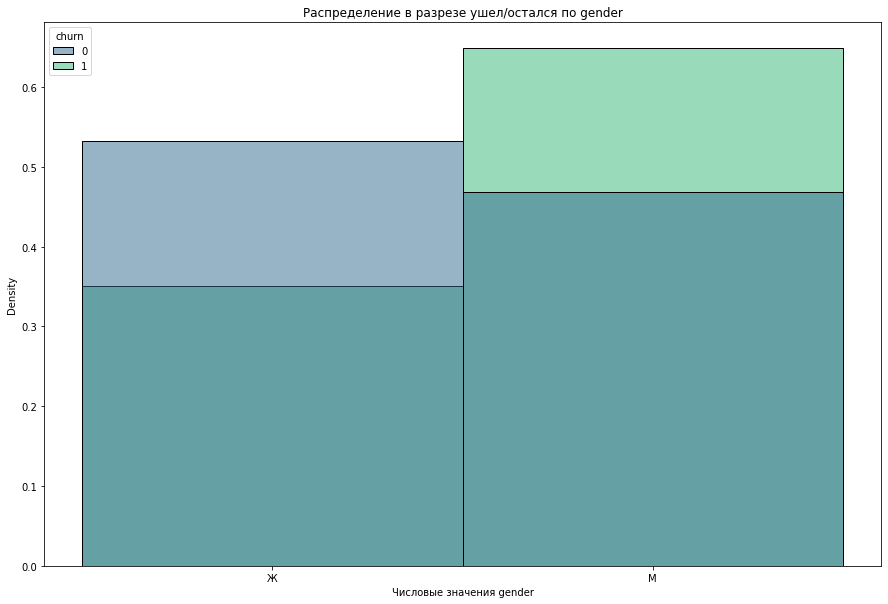

In [54]:
#посмотрим на распределение по полу
graf('gender')

In [55]:
ot_cat('gender')

,gender,count,share
0,М,1168,64.89
1,Ж,632,35.11


**Отток больше среди мужчин - 65%, у женщин всего 35,11%**

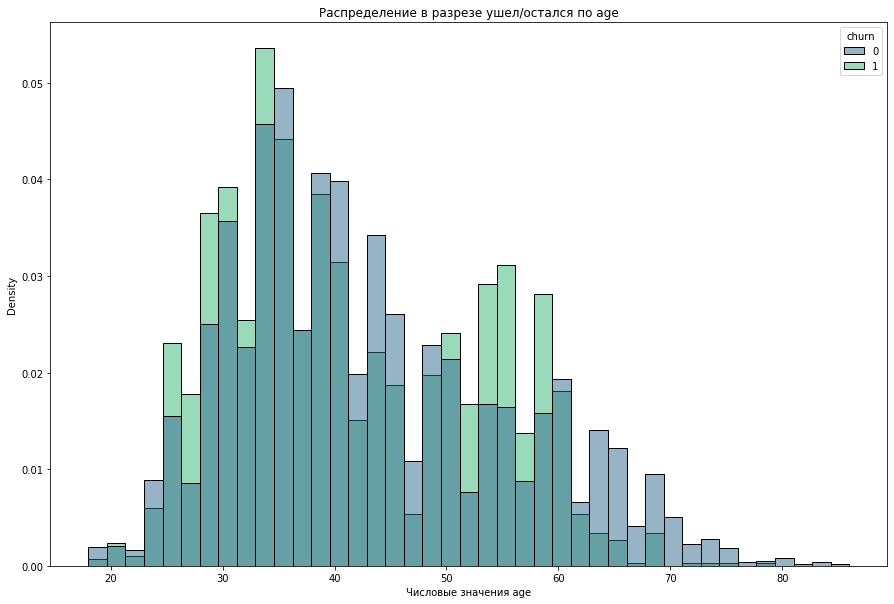

In [56]:
#посмотрим на распределение по возрасту
graf('age')

In [57]:
# создадим функцию, которая разобьет по категориям возраст
def age_cat(data):
    if (data['age'] >= 18 and data['age'] <= 28):
        return '18-28'
    elif (data['age'] >= 29 and data['age'] <= 45):
        return '29-45'
    elif (data['age'] >= 46 and data['age'] <= 61):
        return '46-61'
    else:
        return '62+'

In [58]:
# создадим новый столбец и применим функцию к датафрейму
data['age_category'] = data.apply(age_cat, axis=1)
data.head(10)

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,sc_category,age_category
0,183012,850,Рыбинск,Ж,25,1,59214.82,2,0,1,75719.14,1,Средний балл,18-28
1,146556,861,Рыбинск,Ж,37,5,850594.33,3,1,0,86621.77,0,Средний балл,29-45
2,120722,892,Рыбинск,Ж,30,0,NaN,1,1,1,107683.34,0,Средний балл,29-45
3,225363,866,Ярославль,Ж,51,5,1524746.26,2,0,1,174423.53,1,Средний балл,46-61
4,157978,730,Ярославль,М,34,5,174.00,1,1,0,67353.16,1,Низкий балл,29-45
5,202305,856,Рыбинск,М,56,4,863687.24,3,1,0,156619.80,0,Средний балл,46-61
6,177259,807,Ярославль,Ж,39,3,405042.44,3,0,1,103838.32,0,Средний балл,29-45
7,218868,825,Ярославль,Ж,38,4,458145.40,2,1,1,68085.48,0,Средний балл,29-45
8,211686,923,Ярославль,М,54,5,1206337.87,2,1,0,155371.79,0,Средний балл,46-61
9,133130,906,Ярославль,Ж,67,0,NaN,1,0,1,238055.53,0,Средний балл,62+


In [59]:
ot_cat('age_category')

,age_category,count,share
0,29-45,959,53.28
1,46-61,592,32.89
2,18-28,200,11.11
3,62+,49,2.72


**Отток больше среди клиентов возрастной группы 29-45 (основной платежеспособный возраст) - 53,28%. Меньше всего в 62+ - 3%**

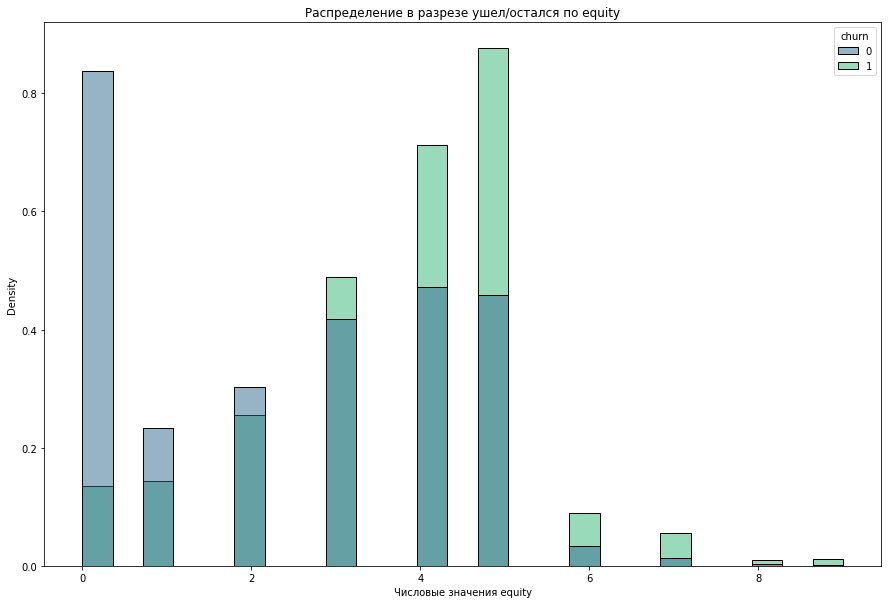

In [60]:
#посмотрим на распределение по возрасту
graf('equity')

In [61]:
# создадим функцию, которая разобьет по категориям собственность
def eq_cat(data):
    if (data['equity'] == 0):
        return 'нет собственности'
    elif (data['equity'] >= 1 and data['equity'] <= 4):
        return '1-4'
    else:
        return '5-9'

In [62]:
# создадим новый столбец и применим функцию к датафрейму
data['eq_category'] = data.apply(eq_cat, axis=1)
data.head(10)

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,sc_category,age_category,eq_category
0,183012,850,Рыбинск,Ж,25,1,59214.82,2,0,1,75719.14,1,Средний балл,18-28,1-4
1,146556,861,Рыбинск,Ж,37,5,850594.33,3,1,0,86621.77,0,Средний балл,29-45,5-9
2,120722,892,Рыбинск,Ж,30,0,NaN,1,1,1,107683.34,0,Средний балл,29-45,нет собственности
3,225363,866,Ярославль,Ж,51,5,1524746.26,2,0,1,174423.53,1,Средний балл,46-61,5-9
4,157978,730,Ярославль,М,34,5,174.00,1,1,0,67353.16,1,Низкий балл,29-45,5-9
5,202305,856,Рыбинск,М,56,4,863687.24,3,1,0,156619.80,0,Средний балл,46-61,1-4
6,177259,807,Ярославль,Ж,39,3,405042.44,3,0,1,103838.32,0,Средний балл,29-45,1-4
7,218868,825,Ярославль,Ж,38,4,458145.40,2,1,1,68085.48,0,Средний балл,29-45,1-4
8,211686,923,Ярославль,М,54,5,1206337.87,2,1,0,155371.79,0,Средний балл,46-61,5-9
9,133130,906,Ярославль,Ж,67,0,NaN,1,0,1,238055.53,0,Средний балл,62+,нет собственности


In [63]:
ot_cat('eq_category')

,eq_category,count,share
0,1-4,1037,57.61
1,5-9,675,37.50
2,нет собственности,88,4.89


**Отток больше среди клиентов владеющих 1-4 собственностью -58%, меньше у не владеющих 5%**

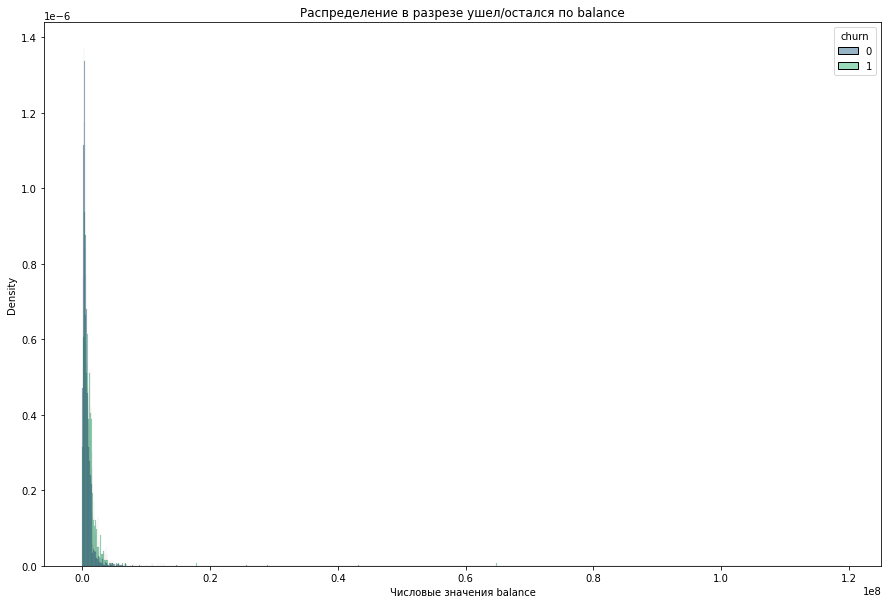

In [64]:
#посмотрим на распределение по возрасту
graf('balance')

In [65]:
zx=data.query('balance<4000000')

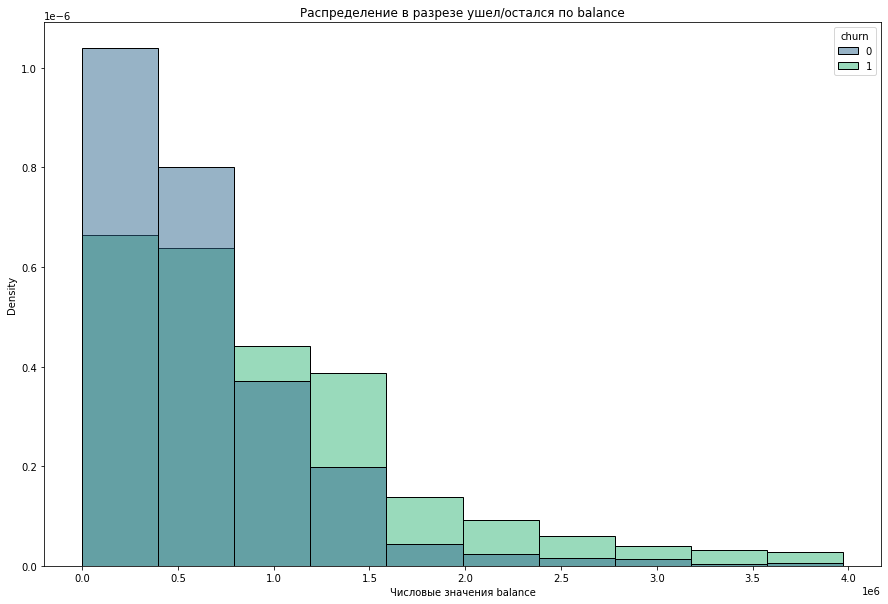

In [66]:
plt.figure(figsize=(15, 10))
sns.histplot(data=zx, hue='churn', x='balance', stat='density', bins=10, common_norm=False, palette="viridis")
plt.title(f"Распределение в разрезе ушел/остался по {'balance'}")
plt.xlabel(f"Числовые значения {'balance'}")
plt.show()  

In [67]:
# создадим функцию, которая разобьет по категориям баланс
def balance_cat(data):
    if (data['balance'] >= 0 and data['balance'] <= 1000000):
        return '0-1млн'
    elif (data['balance'] >= 1000001 and data['balance'] <= 4000000):
        return '1млн-4млн'
    elif (data['balance'] >= 4000001 and data['balance'] <= 20000000):
        return '4млн-20млн'
    else:
        return 'неизвестно'

In [68]:
# создадим новый столбец и применим функцию к датафрейму
data['balan_category'] = data.apply(balance_cat, axis=1)

In [69]:
ot_cat('balan_category')

,balan_category,count,share
0,0-1млн,1079,59.94
1,1млн-4млн,681,37.83
2,4млн-20млн,27,1.50
3,неизвестно,13,0.72


**Отток больше среди клиентов с балансом 0-1млн - 60%(основная масса реальных клиентов), меньше всего тех у кого неизвестен баланс - 0,72%**

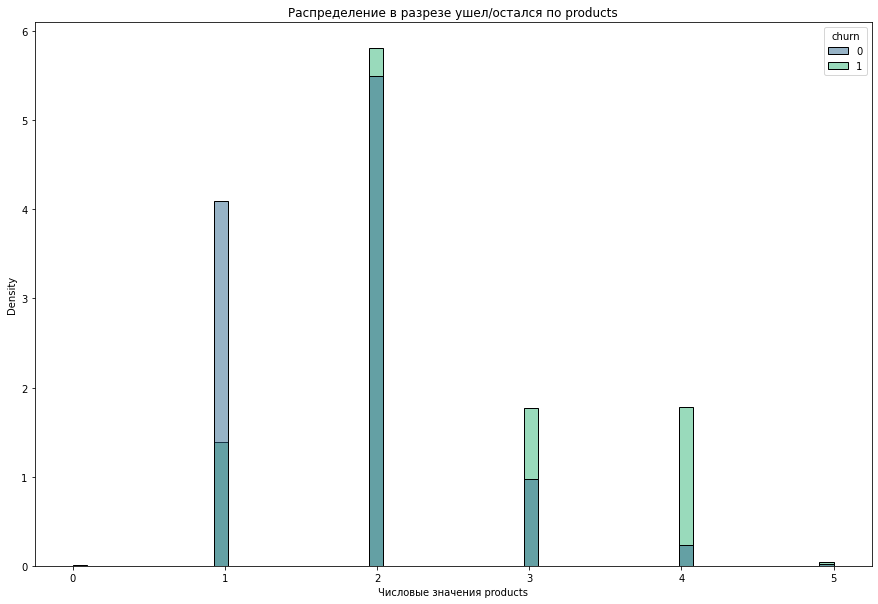

In [70]:
#посмотрим на распределение по продукту
graf('products')

In [71]:
# создадим функцию, которая разобьет по категориям продуктам
def pr_cat(data):
    if (data['products'] == 0):
        return 'нет продуктов'
    elif (data['products'] >= 1 and data['products'] <= 2):
        return '1-2'
    else:
        return '3-5'

In [72]:
# создадим новый столбец и применим функцию к датафрейму
data['pr_category'] = data.apply(pr_cat, axis=1)

In [73]:
ot_cat('pr_category')

,pr_category,count,share
0,1-2,1199,66.61
1,3-5,600,33.33
2,нет продуктов,1,0.06


**Отток больше среди клиентов с 1 или двумя продуктами - 67%, меньше всего у тех у кого вообще нет продуктов банка - 0.06%**

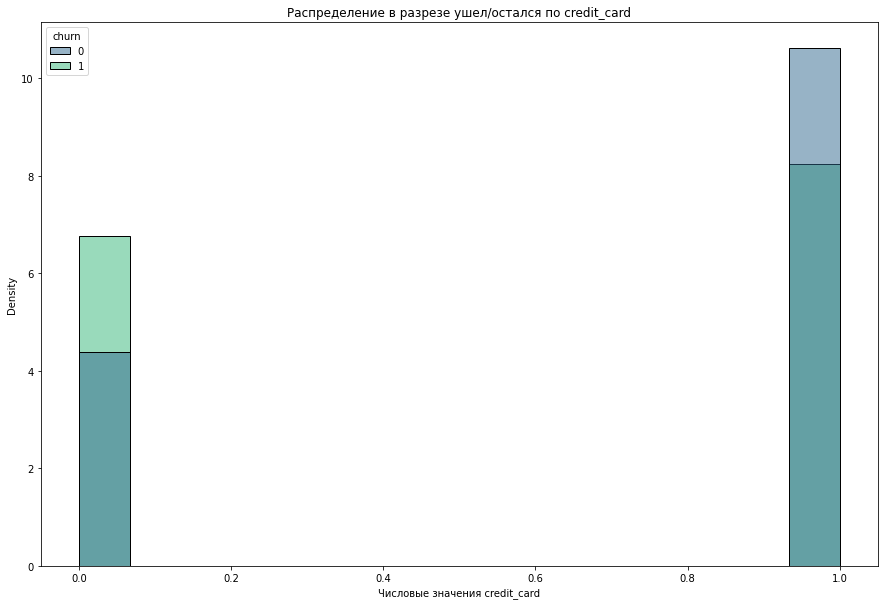

In [74]:
#посмотрим на распределение по кредитной карте
graf('credit_card')

In [75]:
ot_cat('credit_card')

,credit_card,count,share
0,1,989,54.94
1,0,811,45.06


**Наличие кредитной карты банка не особо влияет на отток, но все равно есть разница, 55% владельцев карт решили уйти в отличие от 45% без них**

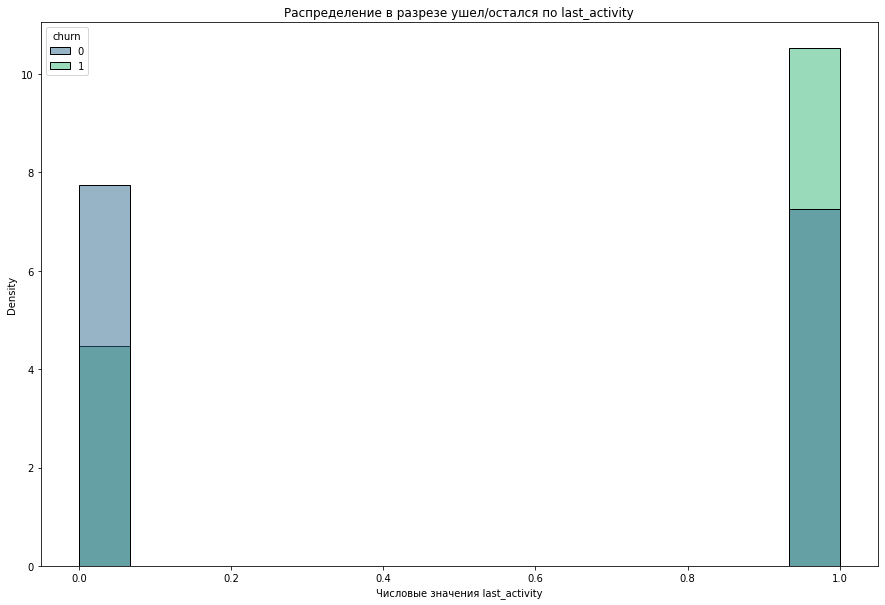

In [76]:
#посмотрим на распределение по активности
graf('last_activity')

In [77]:
ot_cat('last_activity')

,last_activity,count,share
0,1,1263,70.17
1,0,537,29.83


**Активные клиенты больше уходили 70%, видимо они пытались дать шанс банку до последнего**

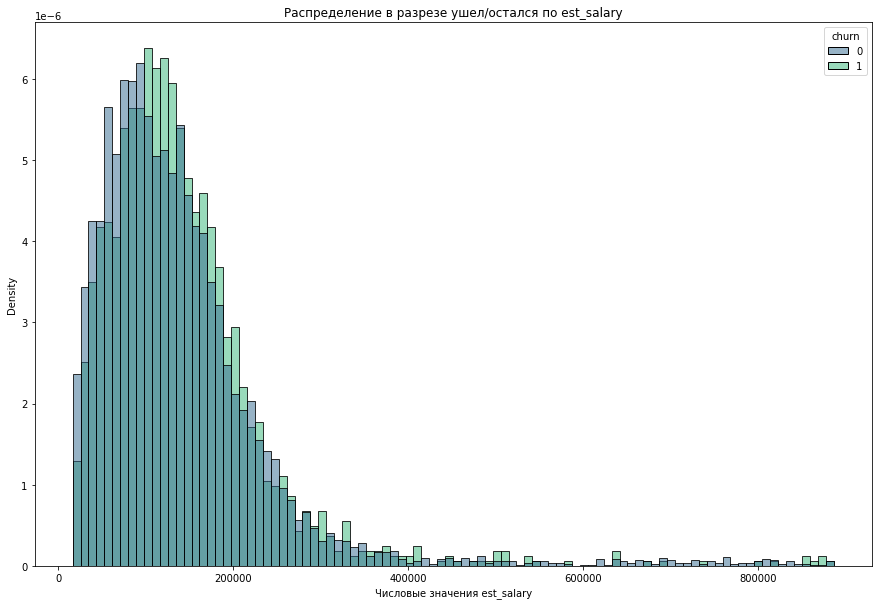

In [78]:
#посмотрим на распределение по зп
graf('est_salary')

In [79]:
# создадим функцию, которая разобьет по категориям зп
def est_cat(data):
    if (data['est_salary'] >= 15000 and data['est_salary'] <= 200000):
        return 'до 200 тыс'
    elif (data['est_salary'] >= 200001 and data['est_salary'] <= 400000):
        return '201 -400тыс'
    else:
        return '400тыс+'

In [80]:
# создадим новый столбец и применим функцию к датафрейму
data['est_category'] = data.apply(est_cat, axis=1)

In [81]:
ot_cat('est_category')

,est_category,count,share
0,до 200 тыс,1496,83.11
1,201 -400тыс,268,14.89
2,400тыс+,36,2.00


**Активные клиенты больше уходили зп до 200 тыс.(основные реальные клиенты) - 83,11%, т.к таких клиентов изначально больше, но и богачи тоже не задерживались - 2%**


<b>Вывод</b>    
    
По итогу анализа можно составить предварительный портер уходящего клиента:
- скоринговый балл - категория средний балл(770-940),
- город - все города,
- пол - мужчина 65% или женщина 35%,
- возраст - категории 29-45- 53,28% или 46-61 - 33%,
- собственность - 1-4 - 58% иди 5-9 - 38%,
- баланс - 0-1млн - 60% или 1-4млн - 38%,
- продукт - 1-2 - 67% или 3-5 - 33,33%,
- кредитка - в наличие - 70% или отсутствует 30%,
- активность - есть - 70% или нету 30%,
- зп - до 200тыс - 83,11% или до 401 тыс - 15%

### Корреляционный анализ данных
Проведем анализ корреляций для поиска параметров, имеющих наибольшую взаимозависимость. Для дальнейшего корреляционого анализа нам необходимо будет кодировать некоторые столбцы, то есть перевести категориальные значения в бинарные, сохраним их в отдельной переменной.

In [82]:
# кодируем данные в столбце gender и city :

cod = pd.get_dummies(data, columns = ['city','gender'])
cod = cod.rename (
    columns = ({'city_Ростов':'Ростов', 'city_Рыбинск':'Рыбинск','city_Ярославль':'Ярославль','gender_Ж':'female', 'gender_М':'male'}))
display (cod.head(10))

,user_id,score,age,equity,balance,products,credit_card,last_activity,est_salary,churn,...,age_category,eq_category,balan_category,pr_category,est_category,Ростов,Рыбинск,Ярославль,female,male
0,183012,850,25,1,59214.82,2,0,1,75719.14,1,...,18-28,1-4,0-1млн,1-2,до 200 тыс,0,1,0,1,0
1,146556,861,37,5,850594.33,3,1,0,86621.77,0,...,29-45,5-9,0-1млн,3-5,до 200 тыс,0,1,0,1,0
2,120722,892,30,0,NaN,1,1,1,107683.34,0,...,29-45,нет собственности,неизвестно,1-2,до 200 тыс,0,1,0,1,0
3,225363,866,51,5,1524746.26,2,0,1,174423.53,1,...,46-61,5-9,1млн-4млн,1-2,до 200 тыс,0,0,1,1,0
4,157978,730,34,5,174.00,1,1,0,67353.16,1,...,29-45,5-9,0-1млн,1-2,до 200 тыс,0,0,1,0,1
5,202305,856,56,4,863687.24,3,1,0,156619.80,0,...,46-61,1-4,0-1млн,3-5,до 200 тыс,0,1,0,0,1
6,177259,807,39,3,405042.44,3,0,1,103838.32,0,...,29-45,1-4,0-1млн,3-5,до 200 тыс,0,0,1,1,0
7,218868,825,38,4,458145.40,2,1,1,68085.48,0,...,29-45,1-4,0-1млн,1-2,до 200 тыс,0,0,1,1,0
8,211686,923,54,5,1206337.87,2,1,0,155371.79,0,...,46-61,5-9,1млн-4млн,1-2,до 200 тыс,0,0,1,0,1
9,133130,906,67,0,NaN,1,0,1,238055.53,0,...,62+,нет собственности,неизвестно,1-2,201 -400тыс,0,0,1,1,0


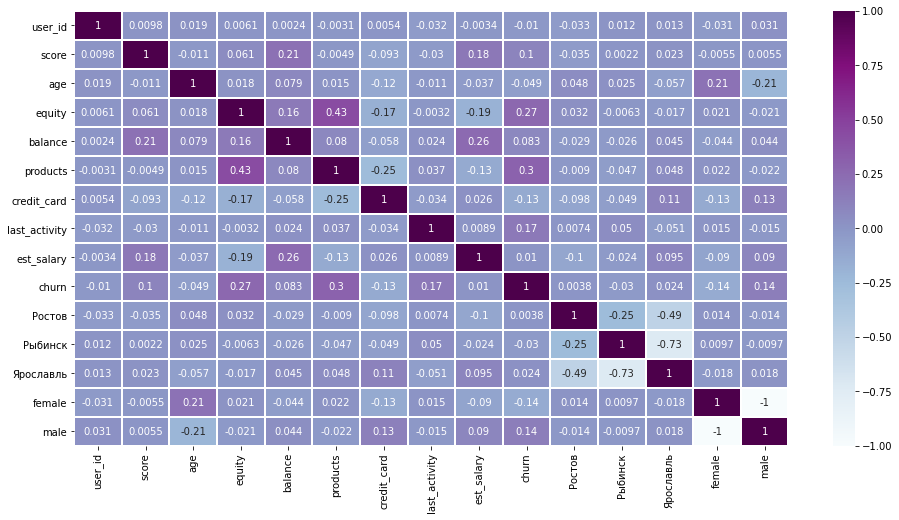

In [83]:
#вызовем метод corr(), чтобы найти коэффициент корреляции для всех параметров:
plt.figure(figsize=(16,8))
sns.heatmap (cod.corr(), annot=True, vmin=-1, vmax=1, center= 0, cmap= 'BuPu', linewidths=1);

In [84]:
v=cod.corr()

<AxesSubplot:>

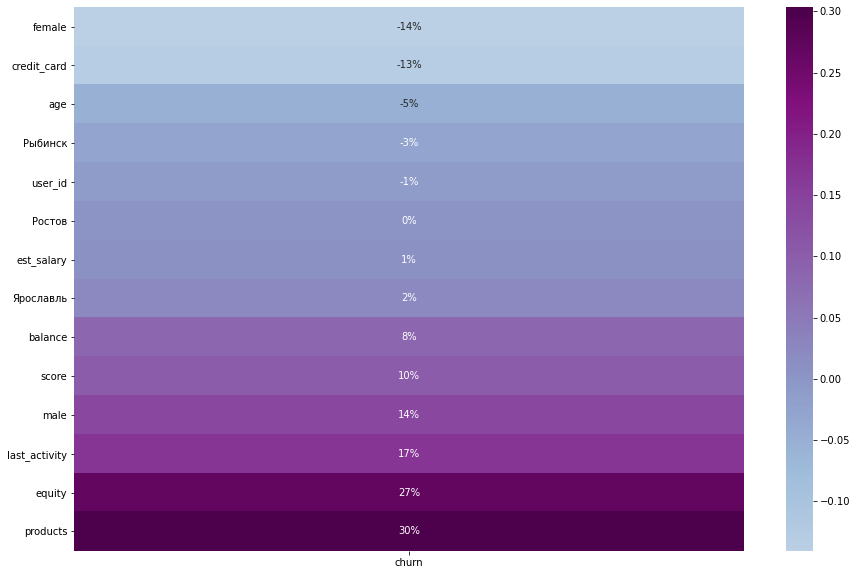

In [85]:
#отобразим только один столбец из матрицы
plt.figure(figsize=(15, 10))
sns.heatmap(v.loc[:,['churn']].drop('churn').sort_values('churn'), annot=True, fmt='.0%', cmap='BuPu', center=0)


<b>Вывод</b>    
    
Благодяря корреляционому анализу упор в сегментации нужно делать по параметрам наибольшей связи:
 - продукт 30%,
 - собственность 27%,
 - активность 17%,
 - пол мужской 14%,
 - скоринговый балл 10%.
    

## Проверка статистических гипотез
4.1. Проверка гипотезы о различия дохода между теми клиентами, которые ушли и теми, которые остались

4.2. Проверка гипотезы о различие в количестве используемых банковских продуктов

4.3. Выводы по шагу

**Когда можно использовать t-критерий?**

Наиболее частые случаи применения t-критерия связаны с проверкой равенства средних значений в двух выборках. равны. Кроме того, в своей исходной форме, t-критерий предполагает независимость сравниваемых выборок. Как раз в нашем случае группы ушедших и оставшихся никак не связаны, поэтому можно считать их независимыми.

Классический подход к проверке статистической значимости требует, чтобы мы устанавливали уровень значимости до того, как обратимся к нашим данным. Часто выбирается уровень в 5%, и поэтому мы на нем и остановимся.

### Проверка гипотезы о различия дохода между теми клиентами, которые ушли и теми, которые остались

Сформулируем нулевую и альтернативную гипотезы:

- H₀: средние доходы оставшихся и отточных клиентов равны
- H₁: средние доходы оставшихся и отточных клиентов не равны

Для проверки гипотезы проведем t-test:

In [86]:
# gipoteza_1 = вызов метода для проверки гипотезы

gipoteza_1 = st.ttest_ind (
    data[data['churn']==0]['est_salary'],
    data[data['churn']==1]['est_salary'], equal_var = False)

alpha = 0.05 # критический уровень статистической значимости

# вывод значения p-value на экран 
print ('p-значение:', gipoteza_1.pvalue) 
# условный оператор с выводом строки с ответом

if gipoteza_1.pvalue < alpha:
    print ('Отвергаем нулевую гипотезу')
else:
    print ('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.28693627509507286
Не получилось отвергнуть нулевую гипотезу


### Проверка гипотезы о различие в количестве используемых банковских продуктов

Сформулируем нулевую и альтернативную гипотезы:

- H₀: средние доходы оставшихся и отточных клиентов равны
- H₁: средние доходы оставшихся и отточных клиентов не равны

Для проверки гипотезы проведем t-test:

In [87]:
# gipoteza_1 = вызов метода для проверки гипотезы

gipoteza_1 = st.ttest_ind (
    data[data['churn']==0]['products'],
    data[data['churn']==1]['products'], equal_var = False)

alpha = 0.05 # критический уровень статистической значимости

# вывод значения p-value на экран 
print ('p-значение:', gipoteza_1.pvalue) 
# условный оператор с выводом строки с ответом

if gipoteza_1.pvalue < alpha:
    print ('Отвергаем нулевую гипотезу')
else:
    print ('Не получилось отвергнуть нулевую гипотезу')

p-значение: 1.5288774544191162e-137
Отвергаем нулевую гипотезу



<b>Вывод</b>    
    
При проверке первой гипотезы о доходах, проведенный t-test показал, что средние доходы оставшихся и отточных клиентов равны. Этот же результат подтвердили выше используемые исследования.
    
При проверке второй гипотезы о количистве используемых продуктов банка, проведенный t-test показал, что количество проуктов различается у оставшихся и ушедших клиентов.
    

## Сегментирование клиентов

**По итогам проведенного анализа и проверки гипотез выделим несколько высокоотточных сегментов пользователей.**

Для этого вспомним портерт уходящего клиента:
- скоринговый балл - категория средний балл(770-940),
- город - все города,
- пол - мужчина 65% или женщина 35%,
- возраст - категории 29-45- 53,28% или 46-61 - 33%,
- собственность - 1-4 - 58% иди 5-9 - 38%,
- баланс - 0-1млн - 60% или 1-4млн - 38%,
- продукт - 1-2 - 67% или 3-5 - 33,33%,
- кредитка - в наличие - 70% или отсутствует 30%,
- активность - есть - 70% или нету 30%,
- зп - до 200тыс - 83,11% или до 401 тыс - 15%

Далее, вспомним ярко выраженные связи обнаруженные через кореряционный анализ:
- продукт 30%,
- собственность 27%,
- активность 17%,
- пол мужской 14%,
- скоринговый балл 10%.
 
Следовательно, на пересечение выше указных парметров сделаем срез, чтобы посмотреть какой отток в таких сегментах:
* Сегмент 1 = мужчины в возрасте 29-45 с 1 или 2 продуктами, у которых в собствености 1-4 балл собственности,
* Сегмент 2 = мужчины в возрасте 46-61 с 1 или 2 продуктами, у которых в собствености 1-4 балл собственности,
* Сегмент 3 = мужчины в возрасте 29-45 с 3 или 5 продуктами, у которых в собствености 1-4 балл собственности,
* Сегмент 4 = мужчины в возрасте 29-45 с 3 или 5 продуктами, у которых в собствености 5-9 балл собственности,
* Сегмент 5 = мужчины в возрасте 46-61 с 3 или 5 продуктами, у которых в собствености 5-9 балл собственности,


* Сегмент 6 = женщины в возрасте 29-45 с 1 или 2 продуктами, у которых в собствености 1-4 балл собственности,
* Сегмент 7 = женщины в возрасте 46-61 с 1 или 2 продуктами, у которых в собствености 1-4 балл собственности,
* Сегмент 8 = женщины в возрасте 29-45 с 3 или 5 продуктами, у которых в собствености 1-4 балл собственности,
* Сегмент 9 = женщины в возрасте 29-45 с 3 или 5 продуктами, у которых в собствености 5-9 балл собственности,
* Сегмент 10 = женщины в возрасте 46-61 с 3 или 5 продуктами, у которых в собствености 5-9 балл собственности.

In [104]:
#под каждый сегмент создадим свою переменную
seg1=data.query('gender == "М" & age_category == "29-45" & pr_category == "1-2" & eq_category == "1-4"')
seg2=data.query('gender == "М" & age_category == "46-61" & pr_category == "1-2" & eq_category == "1-4"')
seg3=data.query('gender == "М" & age_category == "29-45" & pr_category == "3-5" & eq_category == "1-4"')
seg4=data.query('gender == "М" & age_category == "29-45" & pr_category == "3-5" & eq_category == "5-9"')
seg5=data.query('gender == "М" & age_category == "46-61" & pr_category == "3-5" & eq_category == "5-9"')

seg6=data.query('gender == "Ж" & age_category == "29-45" & pr_category == "1-2" & eq_category == "1-4"')
seg7=data.query('gender == "Ж" & age_category == "46-61" & pr_category == "1-2" & eq_category == "1-4"')
seg8=data.query('gender == "Ж" & age_category == "29-45" & pr_category == "3-5" & eq_category == "1-4"')
seg9=data.query('gender == "Ж" & age_category == "29-45" & pr_category == "3-5" & eq_category == "5-9"')
seg10=data.query('gender == "Ж" & age_category == "46-61" & pr_category == "3-5" & eq_category == "5-9"')

In [105]:
print('Сегмент 1')
print('Процент оттока: {:.2%}'.format(seg1['churn'].mean()))
print('Размер группы:', seg1['churn'].count())
print('---------------------------------------')

print('Сегмент 2')
print('Процент оттока: {:.2%}'.format(seg2['churn'].mean()))
print('Размер группы:', seg2['churn'].count())
print('---------------------------------------')

print('Сегмент 3')
print('Процент оттока: {:.2%}'.format(seg3['churn'].mean()))
print('Размер группы:', seg3['churn'].count())
print('---------------------------------------')

print('Сегмент 4')
print('Процент оттока: {:.2%}'.format(seg4['churn'].mean()))
print('Размер группы:', seg4['churn'].count())
print('---------------------------------------')

print('Сегмент 5')
print('Процент оттока: {:.2%}'.format(seg5['churn'].mean()))
print('Размер группы:', seg5['churn'].count())
print('---------------------------------------')

Сегмент 1
Процент оттока: 19.97%
Размер группы: 1252
---------------------------------------
Сегмент 2
Процент оттока: 28.69%
Размер группы: 502
---------------------------------------
Сегмент 3
Процент оттока: 48.02%
Размер группы: 227
---------------------------------------
Сегмент 4
Процент оттока: 52.87%
Размер группы: 174
---------------------------------------
Сегмент 5
Процент оттока: 69.57%
Размер группы: 92
---------------------------------------


In [106]:
print('Сегмент 6')
print('Процент оттока: {:.2%}'.format(seg6['churn'].mean()))
print('Размер группы:', seg6['churn'].count())
print('---------------------------------------')

print('Сегмент 7')
print('Процент оттока: {:.2%}'.format(seg7['churn'].mean()))
print('Размер группы:', seg7['churn'].count())
print('---------------------------------------')

print('Сегмент 8')
print('Процент оттока: {:.2%}'.format(seg8['churn'].mean()))
print('Размер группы:', seg8['churn'].count())
print('---------------------------------------')

print('Сегмент 9')
print('Процент оттока: {:.2%}'.format(seg9['churn'].mean()))
print('Размер группы:', seg9['churn'].count())
print('---------------------------------------')

print('Сегмент 10')
print('Процент оттока: {:.2%}'.format(seg10['churn'].mean()))
print('Размер группы:', seg10['churn'].count())
print('---------------------------------------')

Сегмент 6
Процент оттока: 9.32%
Размер группы: 1095
---------------------------------------
Сегмент 7
Процент оттока: 17.07%
Размер группы: 627
---------------------------------------
Сегмент 8
Процент оттока: 29.50%
Размер группы: 261
---------------------------------------
Сегмент 9
Процент оттока: 42.06%
Размер группы: 107
---------------------------------------
Сегмент 10
Процент оттока: 45.31%
Размер группы: 64
---------------------------------------


**Таким образом выделяем несколько наиболее подходящих сегментов клиентов банка склоных к уходу - Сегмент 1, 2, 6 и 7**

## Итоговый вывод и рекомендации


<b>Вывод</b>    
    
Целью исследования был анализ сегментов клиентов банка, уходящих и склонных к уходу. Проверка гипотез причин оттока клиентов. Анализировался датасет содержащий 10 записей данные о клиентах банка «Метанпром». Банк располагается в Ярославле и областных городах: Ростов Великий и Рыбинск. 
    
    
Над данными произвели предобработку:
- привести к нижнему регистру названия столбцов USERID, EST_SALARY,
- поменяем тип в столбцах score, age,
- проверили на явные и не явные дубликаты,
- изучили пропуски в столбцах age и balance,
- перекодировали часть данных (пол и город).
    
    
В исследовательской части всего зафиксировали 18,5% ушедших клиентов, нашли распределение признаков отточности клиентов, благодаря чему был составлен портрет уходящего клиента:
- скоринговый балл - категория средний балл(770-940),
- город - все города,
- пол - мужчина 65% или женщина 35%,
- возраст - категории 29-45- 53,28% или 46-61 - 33%,
- собственность - 1-4 - 58% иди 5-9 - 38%,
- баланс - 0-1млн - 60% или 1-4млн - 38%,
- продукт - 1-2 - 67% или 3-5 - 33,33%,
- кредитка - в наличие - 70% или отсутствует 30%,
- активность - есть - 70% или нету 30%,
- зп - до 200тыс - 83,11% или до 401 тыс - 15%
    
    
С помощью корреляционного анализа нашли параметры, имеющие наибольшую взаимозависимость:
- продукт 30%,
- собственность 27%,
- активность 17%,
- пол мужской 14%,
- скоринговый балл 10%.

Далее, сформулировали и проверили статистические гипотезы:
- гипотеза 1 о  различиях доходов между теми клиентами, которые ушли и теми, которые остались опровергалась,
- гипотеза 2 о  различиях в количестве используемых банковских продуктов между теми клиентами, которые ушли и теми, которые остались поддтвердилась.
    
    
По итогу были обнаружены сегменты клиентов, которые могут вскоре уйти:
- Сегмент 1 (мужчины в возрасте 29-45 с 1 или 2 продуктами, у которых в собствености 1-4 балл собственности) таких 1252 человека, процент оттока 20%,
- Сегмент 2 (мужчины в возрасте 46-61 с 1 или 2 продуктами, у которых в собствености 1-4 балл собственности) таких 502 человека, процент оттока 29%,
- Сегмент 6 (женщины в возрасте 29-45 с 1 или 2 продуктами, у которых в собствености 1-4 балл собственности) таких 1095 человека, процент оттока 9,32%,
- Сегмент 7 (женщины в возрасте 46-61 с 1 или 2 продуктами, у которых в собствености 1-4 балл собственности) таких 627 человека, процент оттока 17,07%.
    
**Рекомендации:**
* уделить больше внимания рекламе с гендерной спецификой (чем привлечь мужскую половину населения в возрасте 29-45), 
* предложить повышенный кешбек на товары для спорта, активного отдыха и рыбалки(на косметику, товары для дома и одежду.)
* предлагать больше продуктов (наличие 1 кредитной карты уже не релевантно),
* уделить внимание богатым клиентам, возможно финансовая сторона вопроса их уже не интересует, значит подойти с благотовортилеьной стороны, типо процент с их дохода будет передана в детские фонды и т.п,
* реализацию проводить во всех городах,
* точно фиксировать причину активности, в 70% она приводит к оттоку, значите ее нужно разбивать на группы, чтобы во время ловить тревожные звоночки.

